# Ev.2:- Avacado Project

In [1]:
# Importing libraries for model building purposes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the csv dataset file
data=pd.read_csv("avocado.csv")

In [3]:
# For fetching dataset first 5 rows 
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory Data Analysis (EDA)

In [4]:
# For checking how many rows and columns are there in dataset
data.shape

(18249, 14)

In this, the observation is that there are 18249 rows and 14 columns in the complete dataset.

In [5]:
# For checking the number of unique values 
data.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

The unique values are shown above

In [6]:
# For checking the Null/NAN values in the dataset
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no Null/ NaN values in this dataset

In [7]:
# Now check the information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In this, there are 14 columns which we will be using for model building purpose in order to find Region and the Average Price. 
Both are having object and  float datatype respectively.

In [8]:
# For checking the datatypes of each columns.
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
# For checking the statistical summary of the dataset for working ahead.
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Here, i can see that there are outliers and skewness present in all columns of the dataset.

And in the XLarge Bags columns there is too much difference between third quantile i.e 75 % and the Max Values
and talking about skewness it is seen as Right Skewed.

<AxesSubplot:>

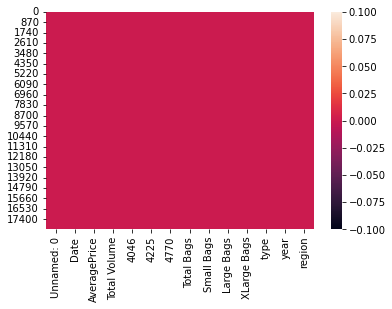

In [10]:
# For checking null values by using heatmap
sns.heatmap(data.isnull())

In [11]:
# For checking the unique values in Unnamed column
data['Unnamed: 0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

Since this column has  int datatype and has values upto 52 
and there is no need to carry forward this column towards further model building processes because of its nature, so it can be dropped 

In [12]:
# Dropping the column Unnamed: 0
data.drop("Unnamed: 0", axis=1, inplace= True)

In [13]:
# For checking whether the column has been removed or not
data.head(n=6)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany


Here the column has been removed as shown above

In [14]:
# For seperating the Date Column into standard DD/MM/YYYY format to avoid duplication of data

# and it is required to drop Date and year present in the dataset

data['Year'],data['Month'],data['Day']=data['Date'].str.split('-').str

data.drop(columns=['Date','year'],inplace=True)

In [15]:
# For checking whether the changes has been done or not
data.head(n=7)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,Albany,2015,11,22
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,Albany,2015,11,15


 Here the Date has been splitted and the the duplicate columns has been removed

In [16]:
# By using drop_duplicates method 
data.drop_duplicates()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [17]:
# For checking the datatypes of New columns 
data.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
region           object
Year             object
Month            object
Day              object
dtype: object

As the new columns Date, Month and Year has a numerical values so the dataype must be float64 or int64 so conversion is required   

In [18]:
# Converting the dtype from object to int and changing  column day to Date for better understanding and deleting Day column from dataset
data['Year']=data['Year'].astype(int)
data['Month']=data['Month'].astype(int)
data['Date']=data['Day'].astype(int)

In [19]:
# For dropping day column as it has been renamed to Date as shown above and this is done to avoid duplicacy
data.drop(columns=['Day'], inplace=True)

In [20]:
# For checking the above changes done
data.head(n=6)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,Albany,2015,11,22


Here it is seen that columns has been changed to dtype int also

In [21]:
# for checking the unique values in XLarge Bags column as it is a different kind of column with head and tail values as 0
data['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

Here it is showing the Qty of avacados, so i think removing it might affect the model performance

In [22]:
# After removing and spliiting of columns, checking the Number of unique values in dataset
data.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
region             54
Year                4
Month              12
Date               31
dtype: int64

In [23]:
# For checking the skewness
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
Year             0.215339
Month            0.106617
Date             0.014310
dtype: float64

In this, mostlty all columns have high level of skewness except some columns like Average Price, Year, Month and Date.

# Performing Univariate Analysis 

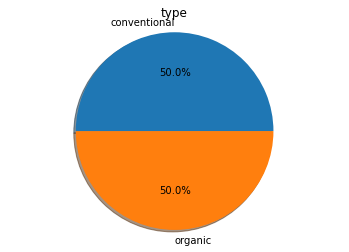

In [24]:
import matplotlib.pyplot as plt
a=data['type'].value_counts()
plt.pie(a,labels=a.index, shadow=True, autopct="%0.1f%%")
plt.title("type")
plt.axis("equal")
plt.show()

In the pie plot shown above, there are two types of Farming i.e conventional and organic, conventional farming uses fertilizers and chemical during farming and
Organic farming is having more input cost and takes more time to cultivate than conventional farming. Howver, it is very good for health.

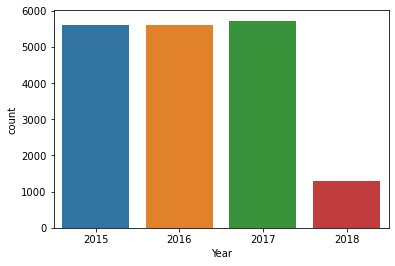

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


In [25]:
# For checking the data in year format with another plotting method
sns.countplot(x="Year", data=data)
plt.show()
print(data['Year'].value_counts())

In the countplot shown above,  there is almost equal quantity sold in  year 2015 till 2017, but there is a drop in 2018, i think  because this data was saved in first half or mid of the year 2018.

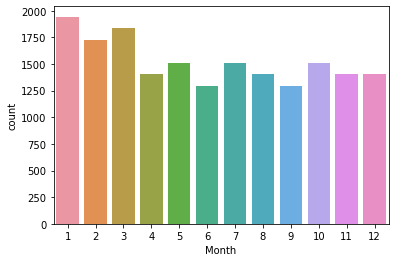

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


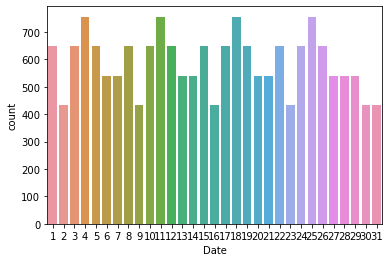

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: Date, dtype: int64


In [26]:
# For checking data in Month and Date format
sns.countplot(x='Month', data=data)
plt.show()
print(data['Month'].value_counts())


sns.countplot(x='Date', data=data)
plt.show()
print(data['Date'].value_counts())

Date and Month wise distribution is seen above

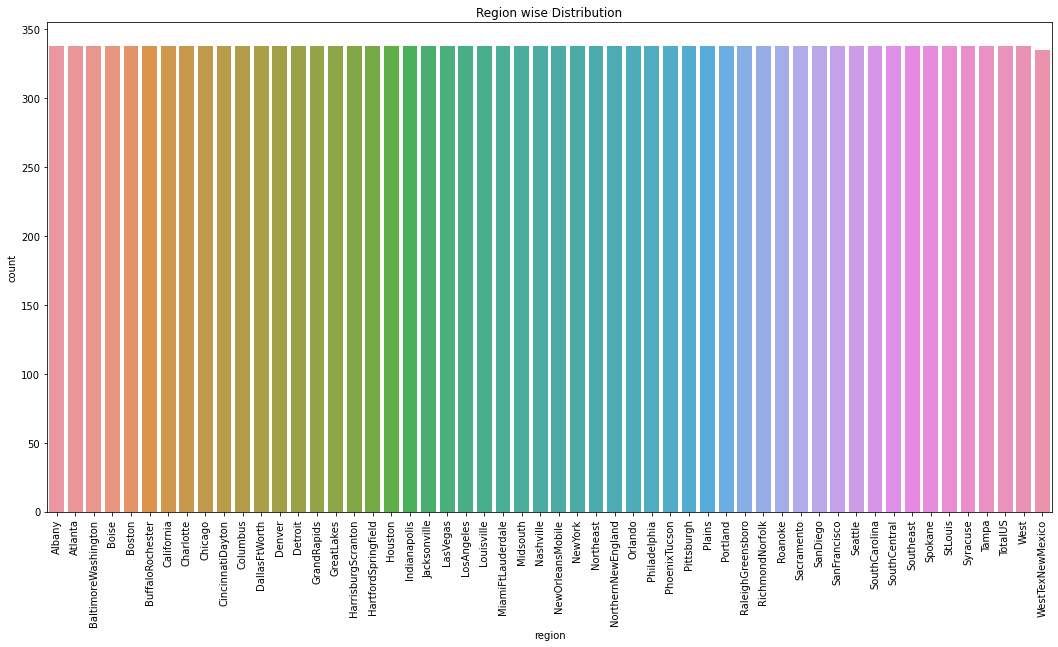

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [27]:
# For checking Region wise Avacados sale
plt.figure(figsize=(18,9))
sns.countplot(data['region'], data=data)
plt.title('Region wise Distribution')
plt.xticks(rotation=90)
plt.show()
print(data['region'].value_counts())

In this, there is a simple observation that all regions have taken the same quantity of Avacados 
except only 1 WestTexNewMexico which has taken 335 so there is a very minimal gap in it.

# Bivariate Analysis:-

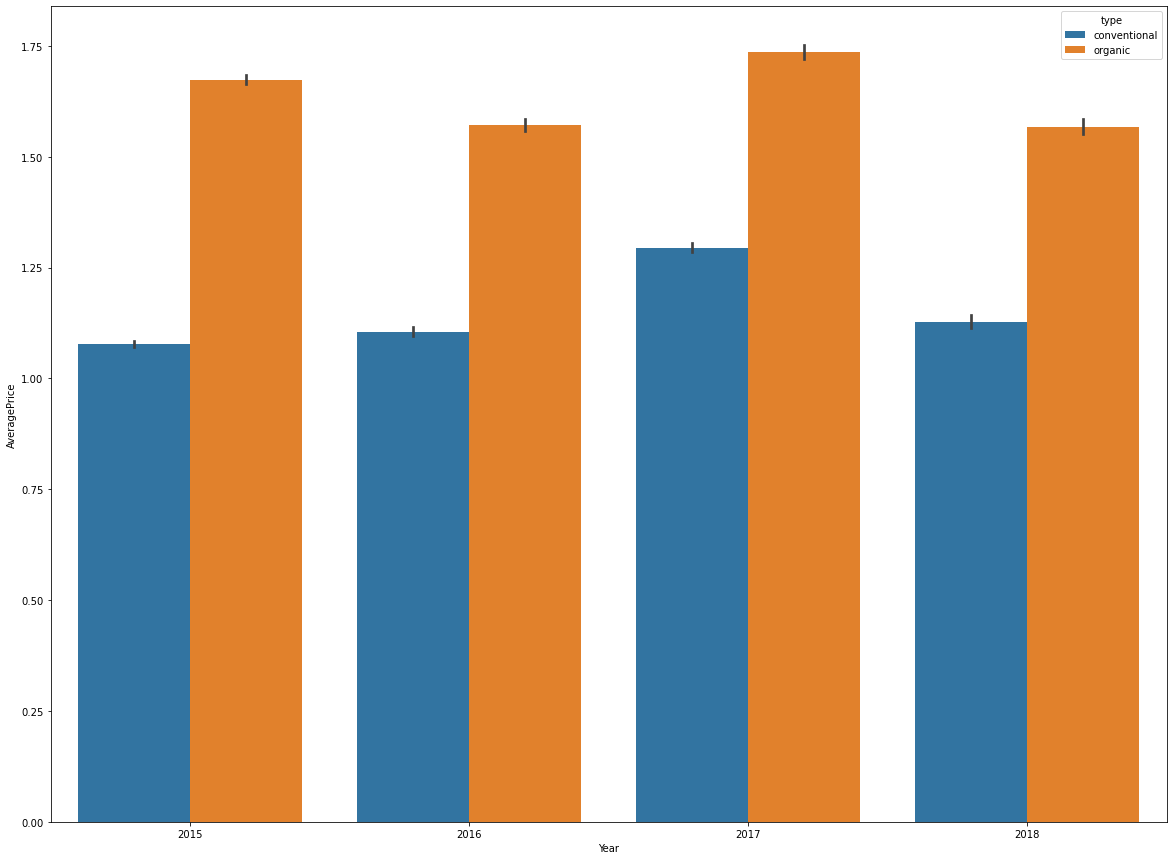

In [28]:
# For checking Average Price in Year format with another plotting method:-
plt.figure(figsize=(20,15))
sns.barplot(x='Year',y='AveragePrice', hue='type', data=data)
plt.show()

In this, the prices of Conventional Avacado was almost similar except in 2017 when it was little costlier,
whereas Organic Avacado prices varied a little every year.

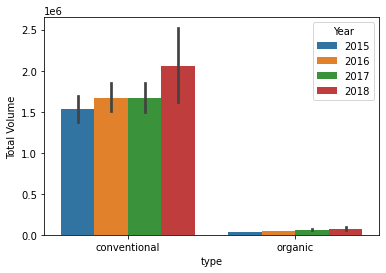

In [29]:
# For checking  and visualising the Volume sold for conventional and organic with another plotting method:-
sns.barplot(x='type', y='Total Volume', hue='Year', data= data)
plt.show()

In the above plot, there is a huge difference between conventional and organic farming.

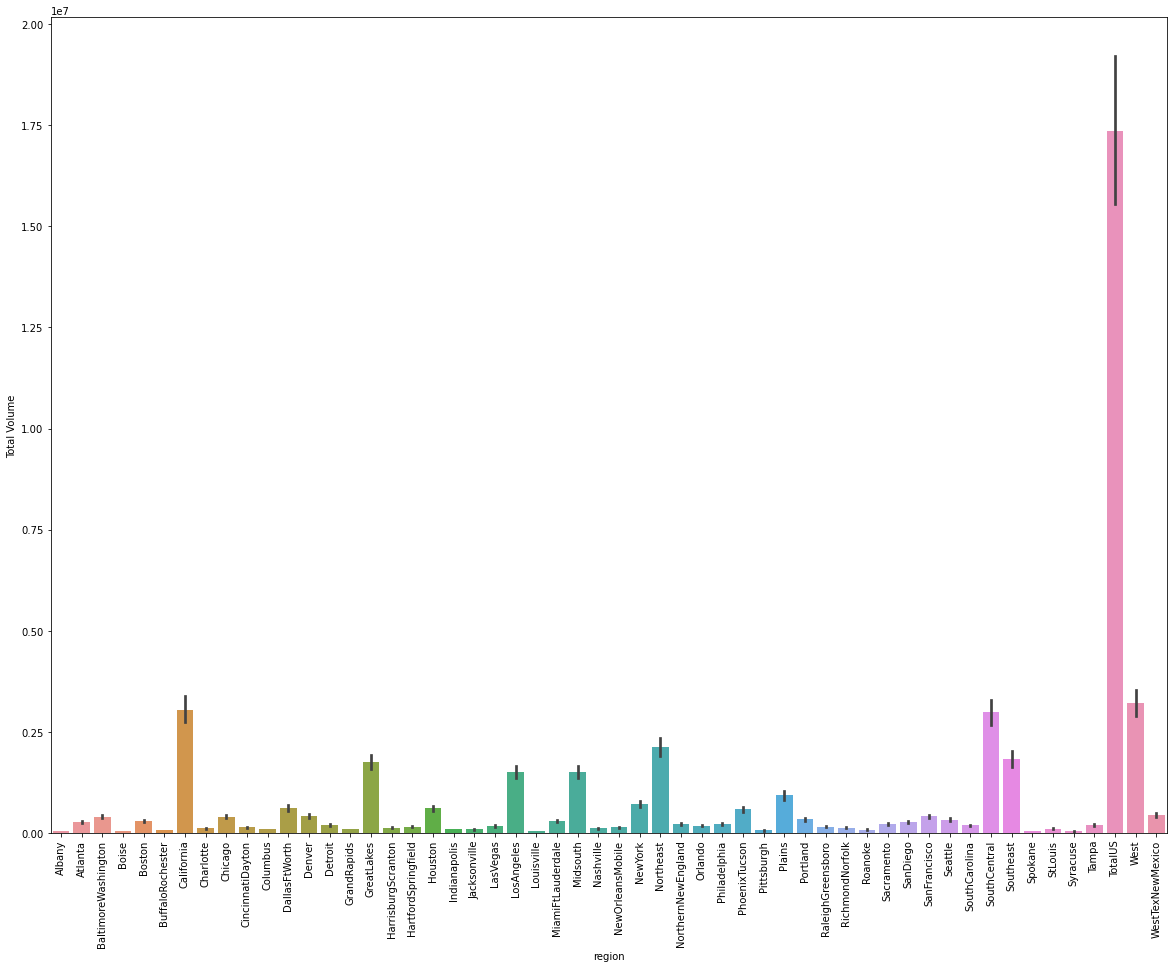

In [30]:
# For checking Total volume in Region wise.
plt.figure(figsize=(20,15))
sns.barplot(x='region', y='Total Volume', data=data)
plt.xticks(rotation=90)
plt.show()

In this,there is a sorted number of Total Volume of avacados sold in each region.

<Figure size 4680x936 with 0 Axes>

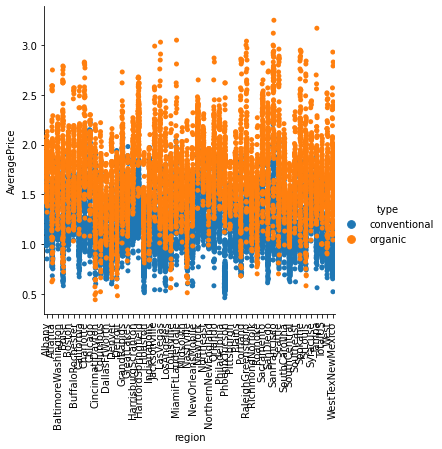

In [31]:
# For checking AV Price Region wise with another plotting method:-
plt.figure(figsize=(65,13))
sns.catplot(x="region", y="AveragePrice", hue='type', data=data)
plt.xticks(rotation=90)
plt.show()

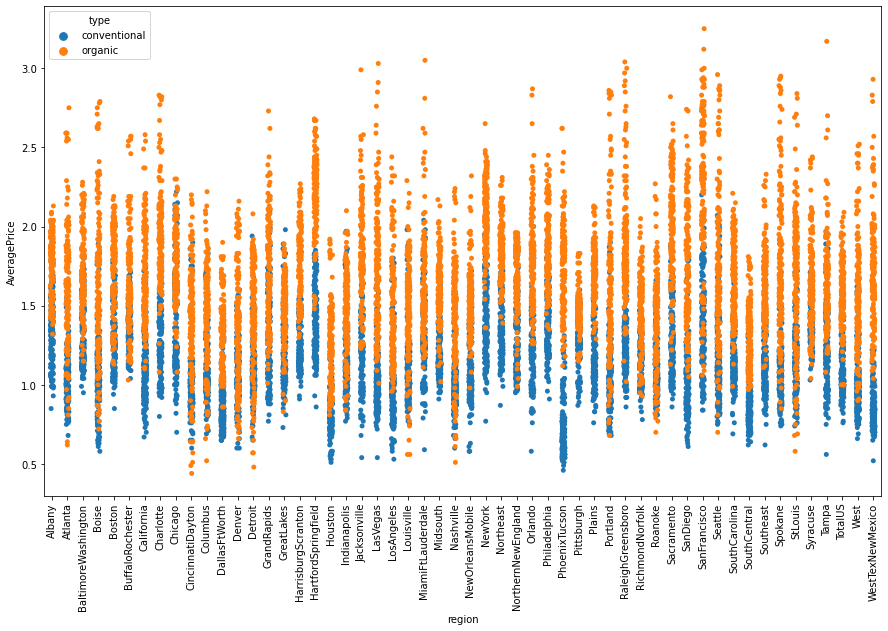

In [32]:
# For checking distribution with another plotting method
plt.figure(figsize=(15,9))
sns.stripplot(x="region", y="AveragePrice", hue='type', data=data)
plt.xticks(rotation=90)
plt.show()

# Multivariate Analysis:-

In [33]:
# For cheking correlation in dataset
corr=data.corr()

In [34]:
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Date
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
Year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


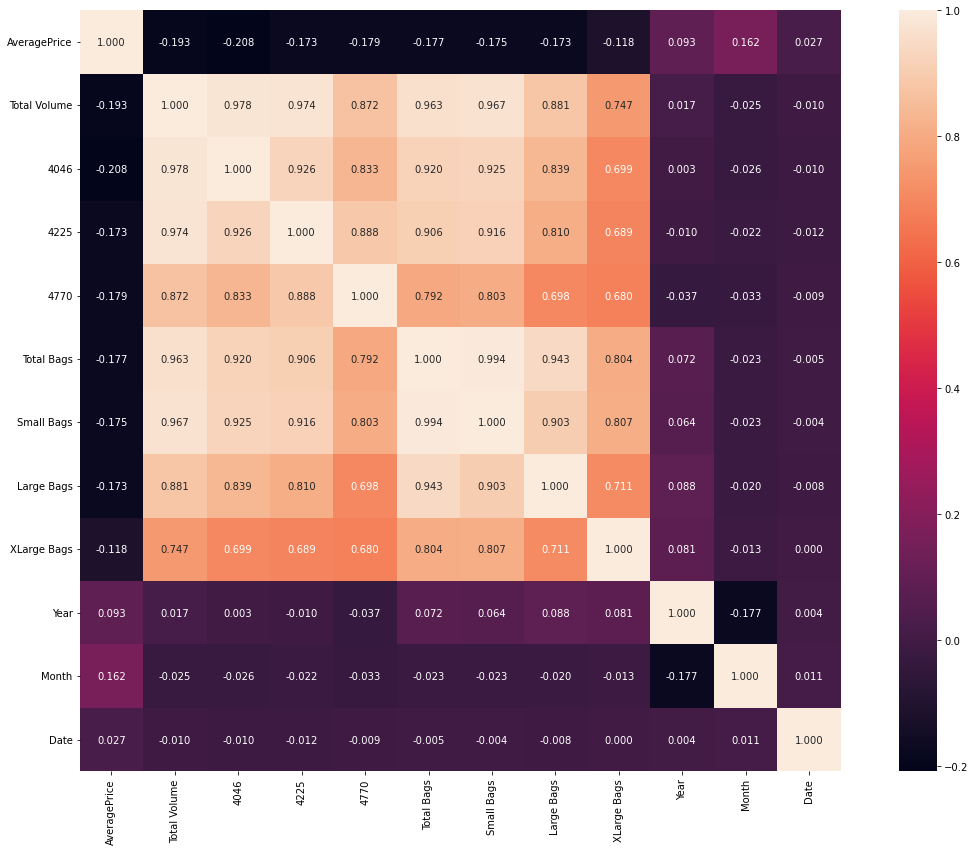

In [35]:
# For checking correlation using heatmap
plt.figure(figsize=(21,14))
sns.heatmap(data.corr(), annot=True, square= True, fmt='0.3f')
plt.xticks(rotation=90)
plt.show()

In the above, there is high correlation between columns like Total Volume, X-large bags, large bags, Small bags,Total bags,4740,
4225,4046.

# ENCODING TECHNIQUES:-

In [36]:
# For converting categorical values into numerical 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data["region"]=oe.fit_transform(data["region"].values.reshape(-1,1))
data['type']=oe.fit_transform(data['type'].values.reshape(-1,1))
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0,2018,1,14


In the above, the categorical data has been changed to numerical values for model building purposes.

AveragePrice       AxesSubplot(0.125,0.657941;0.133621x0.222059)
Total Volume    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
4046             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
4225            AxesSubplot(0.606034,0.657941;0.133621x0.222059)
4770            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Total Bags         AxesSubplot(0.125,0.391471;0.133621x0.222059)
Small Bags      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Large Bags       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
XLarge Bags     AxesSubplot(0.606034,0.391471;0.133621x0.222059)
type            AxesSubplot(0.766379,0.391471;0.133621x0.222059)
region                AxesSubplot(0.125,0.125;0.133621x0.222059)
Year               AxesSubplot(0.285345,0.125;0.133621x0.222059)
Month               AxesSubplot(0.44569,0.125;0.133621x0.222059)
Date               AxesSubplot(0.606034,0.125;0.133621x0.222059)
dtype: object

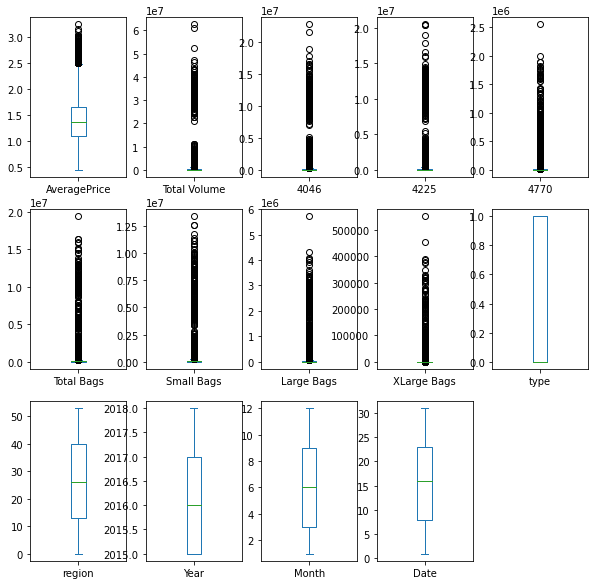

In [37]:
# For checking the outliers present in our dataset:-
data.plot(kind='box',figsize=(10,10),layout=(3,5),subplots=True)

In the above boxplot, it is seen that there are Very high count of Outliers Present in columns like:-
Total Volume, 4046,4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags & some outliers are there in Average price also, so we should treat it for model building

In [38]:
# Using Zscore methof for removal of outliers

import scipy
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3

In [39]:
data1=data[(z<3).all(axis=1)]
data1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0,2018,1,14


In the above removal process, it is clearly seen now that the outliers has been removed which is beneficial 
for model to predict better and give results.

In [40]:
# For checking the shape of dataset now after removing outliers
data1.shape

(17651, 14)

In [41]:
# For checking the percentage of data lost during outlier removal
datalost=(data.shape[0]-data1.shape[0])/data.shape[0]*100
datalost

3.276891884486821

So, with the usage of Zscore method, there is a loss of 3.27% data.

In [42]:
# For checking the skewness present in data1 dataframe:-
data1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
Year            0.229976
Month           0.107408
Date            0.011778
dtype: float64

In this, after removing outliers we can observe that the skewness has been dropped to some extent 
but it is still above acceptable range
so, it must be removed as much as possible.

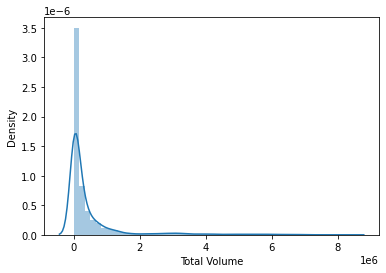

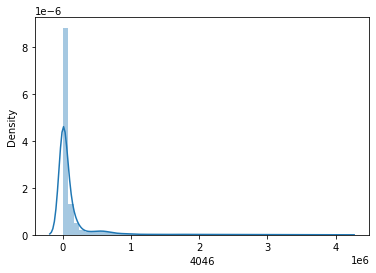

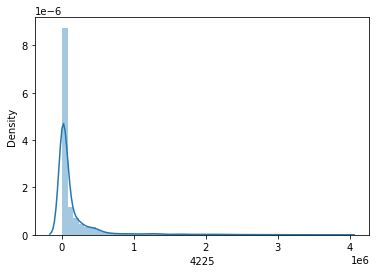

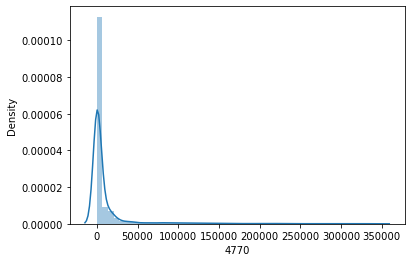

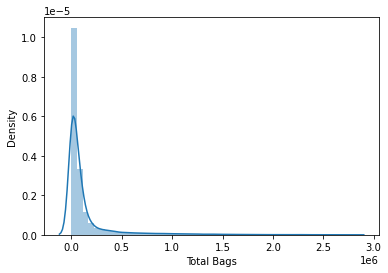

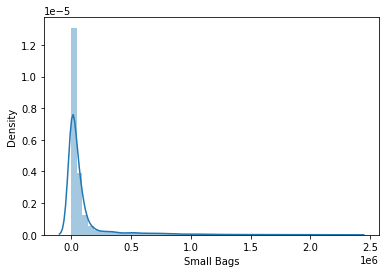

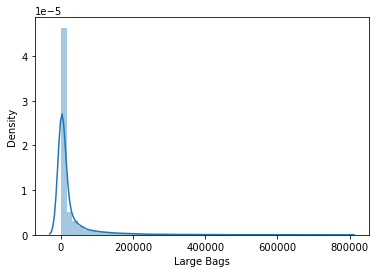

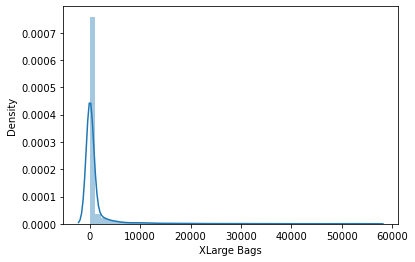

In [43]:
# For visualising skewness using distplot
s=["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]

for i in s:
    sns.distplot(data1[i])
    plt.show()

In [44]:
# Now for removing skewness using Cuberoot:-
sr=["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]

for i in sr:
    data1[i]=np.cbrt(data[i])

In [45]:
# For checking the skewness levels after removals
data1.skew()

AveragePrice    0.377432
Total Volume    1.240435
4046            1.555876
4225            1.277025
4770            1.635614
Total Bags      1.231831
Small Bags      1.246033
Large Bags      1.276213
XLarge Bags     2.277028
type           -0.037741
region          0.012798
Year            0.229976
Month           0.107408
Date            0.011778
dtype: float64

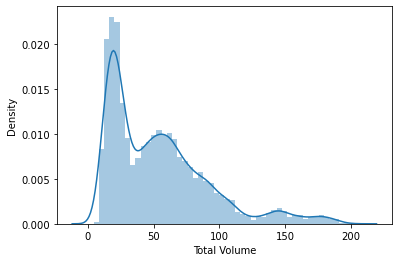

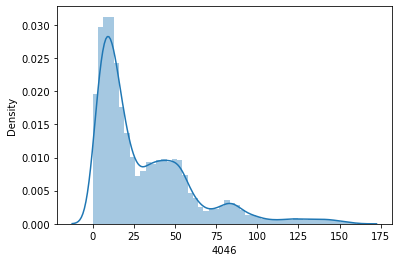

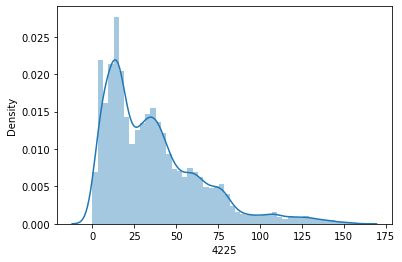

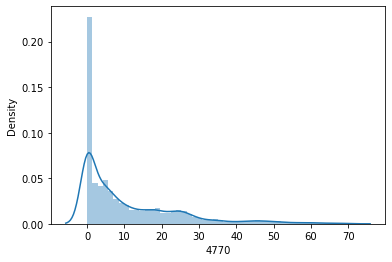

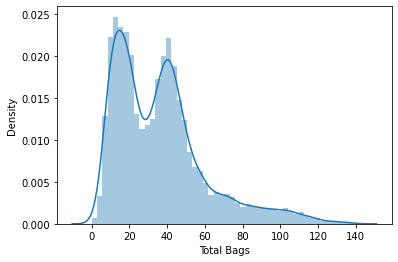

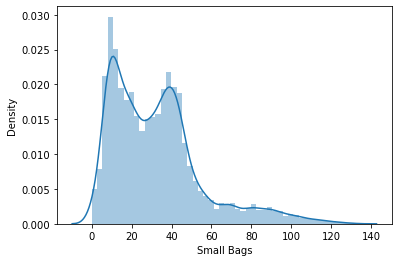

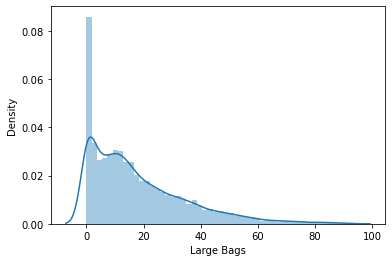

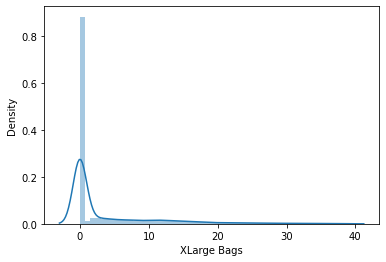

In [46]:
# For visusalisation of removed skewness using distplot
for i in sr:
    sns.distplot(data1[i])
    plt.show()

In the above removal of skewness, it is seen that the skewness has been removed for proceeding towards building

# Model Building:-

So in this , two models are required to be predict:
The first prediction is commencing for prediction of Average Price

# Model No. 1 for predicting the Average Price:-

DATA STANDARDIZATION:-

In [47]:
# For splitting data into training and testing phases
x=data1.drop(["AveragePrice"], axis=1)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0.0,0.0,2015,12,27
1,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0.0,0.0,2015,12,20
2,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0.0,0.0,2015,12,13
3,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0.0,0.0,2015,12,6
4,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1.0,53.0,2018,2,4
18245,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1.0,53.0,2018,1,28
18246,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1.0,53.0,2018,1,21
18247,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1.0,53.0,2018,1,14


In [48]:
# Assigning y to Target Column
y=data1["AveragePrice"]
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

Here, in Model No. 1 the Target column is having Continous data with float datatype, so it is a Regression Model.

In [49]:
# Importing neccessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [50]:
# For finding the Best Random State:-
best=0
acc=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    model=LinearRegression()
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    tempacc=r2_score(y_test,pred)
    if tempacc>acc:
        acc=tempacc
        best=i

print(f"r2_score: {tempacc}")  
print(f"BRS:{best}")

r2_score: 0.5421592108170765
BRS:6


So, here the R2 score comes to 54% above

# Now checking on Mulitiple Models and applying Regularization Techniques:-

In [51]:
# for checkimg score by using Multiple models to get the accuracy
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [52]:
# Here i am seperating data for train and test phases
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=8)
model=[LinearRegression(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),
       AdaBoostRegressor(),GradientBoostingRegressor(),Lasso(),Ridge(),ElasticNet()]

In [53]:
# For fitting code to find the accuracy and R2 Scores
for i in model:
    i.fit(x_train,y_train)
    pre=i.predict(x_test)
    print("Accuracy Score",i,"is",i.score(x_train,y_train))
    print("\nError")
    print("Mean Absolute Error", mean_absolute_error(y_test,pre))
    print("Root Mean Squared Error", (mean_squared_error(y_test,pre))**0.5)
    print("r2 Score ", r2_score(y_test,pre))
    
    
    print("----------------------------------------")
    print("\n\n")

Accuracy Score LinearRegression() is 0.5329772409536041

Error
Mean Absolute Error 0.20910793311810014
Root Mean Squared Error 0.2657947521781981
r2 Score  0.539434148693533
----------------------------------------



Accuracy Score KNeighborsRegressor() is 0.8498805110793053

Error
Mean Absolute Error 0.13362021300702467
Root Mean Squared Error 0.1880663083183583
r2 Score  0.7694203746908442
----------------------------------------



Accuracy Score SVR() is 0.3592608546192867

Error
Mean Absolute Error 0.2469885143694163
Root Mean Squared Error 0.31211937347600566
r2 Score  0.3649025296438595
----------------------------------------



Accuracy Score RandomForestRegressor() is 0.9838070463423783

Error
Mean Absolute Error 0.0928673917969635
Root Mean Squared Error 0.13126156515252477
r2 Score  0.8876756053179755
----------------------------------------



Accuracy Score AdaBoostRegressor() is 0.5715845999976426

Error
Mean Absolute Error 0.20772634196131678
Root Mean Squared Error 0.

In the above, it is observed that the RandomForest Regressor is giving  the best  R2 score of 88.77% among all  models
It is now seen that after cross validation and other parameters tuning it will be further improved or not, so it needs to be checked.

# CROSS VALIDATION PHASE:-

In [54]:
# For finalising the best model using Cross Validation
for C in model:
    cvs=cross_val_score(C, x_train,y_train, cv=5, scoring='r2')
    print("score of",C,"is,cvs")
    print("Mean Score of",C,"is",cvs.mean(),"\nStandard Deviation is",cvs.std())
    
    print("--------------------------------------")

score of LinearRegression() is,cvs
Mean Score of LinearRegression() is 0.5320369103817512 
Standard Deviation is 0.009950402883358543
--------------------------------------
score of KNeighborsRegressor() is,cvs
Mean Score of KNeighborsRegressor() is 0.7516544365288702 
Standard Deviation is 0.0038101803139016658
--------------------------------------
score of SVR() is,cvs
Mean Score of SVR() is 0.35047931331172383 
Standard Deviation is 0.007577608066772206
--------------------------------------
score of RandomForestRegressor() is,cvs
Mean Score of RandomForestRegressor() is 0.8721738412122979 
Standard Deviation is 0.005672303291204008
--------------------------------------
score of AdaBoostRegressor() is,cvs
Mean Score of AdaBoostRegressor() is 0.5671559205380976 
Standard Deviation is 0.012203241089445977
--------------------------------------
score of GradientBoostingRegressor() is,cvs
Mean Score of GradientBoostingRegressor() is 0.7460138509520077 
Standard Deviation is 0.00971097

So, after doing Cross Validation, Random Forest is here also giving best results with score of 87.3%.

# HYPER PARAMETER TUNING OF BEST MODEL:-

In [55]:
# Importing libraries for ensembling
from sklearn.model_selection import GridSearchCV

In [56]:
random=RandomForestRegressor()

In [58]:
parameters={"criterion":['absolute_error','poisson'],"n_estimators":[100]}
clf=GridSearchCV(random,parameters)
clf.fit(x,y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['absolute_error', 'poisson'],
                         'n_estimators': [100]})

In [61]:
print(clf.best_params_)

{'criterion': 'absolute_error', 'n_estimators': 100}


In [62]:
# For checking with Random Forest
random=RandomForestRegressor(criterion='poisson',n_estimators=100)
random.fit(x_train,y_train)
random.score(x_train,y_train)
pred=random.predict(x_test)
print("Accuracy score: ", r2_score(y_test,pred))
print("Mean Absolute Error", mean_absolute_error(y_test,pred))
print("Root Mean Squared Error", (mean_squared_error(y_test,pred))**0.5)

Accuracy score:  0.6636685048221833
Mean Absolute Error 0.1675576251982778
Root Mean Squared Error 0.22713512694359642


In [63]:
# As RandomForest is giving less score now so finding with another method
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
Knn=KNeighborsRegressor()
parameters={'weights':['uniform', 'distance'],'n_neighbors':[1,5]}
clf=GridSearchCV(Knn,parameters)
clf.fit(x,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 5],
                         'weights': ['uniform', 'distance']})

In [64]:
print(clf.best_params_)

{'n_neighbors': 5, 'weights': 'distance'}


In [65]:
# For checking with KNN to find best R2 score
Knn=KNeighborsRegressor(n_neighbors=5,weights='distance')
Knn.fit(x_train,y_train)
Knn.score(x_train,y_train)
pred=Knn.predict(x_test)
print("Accuracy score: ", r2_score(y_test,pred))
print("Mean Absolute Error", mean_absolute_error(y_test,pred))
print("Root Mean Squared Error", (mean_squared_error(y_test,pred))**0.5)

Accuracy score:  0.7786747214614522
Mean Absolute Error 0.13036271998029092
Root Mean Squared Error 0.184253626626848


In this, after Hyper parameter tuning, the Random Forest score has been reduced and now KNN is giving better score of 78%

# So  KNeighborsRegressor is the Final Model for Model 1

# Saving Model 1:-

In [66]:
# For saving the best final model
import pickle

Name="AvacadoAP.pkl"
pickle.dump(random,open(Name,'wb'))

Loading Model:-

In [67]:
Load_Model=pickle.load(open(Name,'rb'))

Load_Model.predict(x_test)

array([1.2558, 1.2448, 1.8093, ..., 1.3463, 1.82  , 1.0423])

# Model No. 2 Classification Model and Target Column is Region.

In [68]:
data1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0.0,0.0,2015,12,27
1,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0.0,0.0,2015,12,20
2,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0.0,0.0,2015,12,13
3,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0.0,0.0,2015,12,6
4,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1.0,53.0,2018,2,4
18245,1.71,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1.0,53.0,2018,1,28
18246,1.87,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1.0,53.0,2018,1,21
18247,1.93,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1.0,53.0,2018,1,14


In [69]:
# For splitting data into training and testing phases
X1=data1.drop(['region'],axis=1)
X1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month,Date
0,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0.0,2015,12,27
1,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0.0,2015,12,20
2,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0.0,2015,12,13
3,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0.0,2015,12,6
4,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1.0,2018,2,4
18245,1.71,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1.0,2018,1,28
18246,1.87,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1.0,2018,1,21
18247,1.93,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1.0,2018,1,14


In [70]:
# For splitting data into training and testing phases
Y1=data1['region']
Y1

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
18244    53.0
18245    53.0
18246    53.0
18247    53.0
18248    53.0
Name: region, Length: 17651, dtype: float64

# SCALING TECHNIQUES:

In [71]:
# Importing libraries for scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_X1=scaler.fit_transform(X1)
scaled_X1=pd.DataFrame(scaled_X1)

In [72]:
# Printing dataframe created above
scaled_X1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.195352,-0.360017,-0.709648,0.059642,-0.533970,-0.648548,-0.517773,-0.796802,-0.51836,-1.019047,-1.210013,1.644612,1.289309
1,-0.143510,-0.413581,-0.755064,-0.025495,-0.516157,-0.623078,-0.490834,-0.792817,-0.51836,-1.019047,-1.210013,1.644612,0.491652
2,-1.232207,-0.123856,-0.738480,0.406050,-0.427502,-0.666838,-0.537584,-0.787683,-0.51836,-1.019047,-1.210013,1.644612,-0.306004
3,-0.843387,-0.285278,-0.699539,0.189057,-0.494395,-0.755024,-0.633026,-0.762704,-0.51836,-1.019047,-1.210013,1.644612,-1.103660
4,-0.324959,-0.437308,-0.720397,-0.032969,-0.489909,-0.739523,-0.619211,-0.720851,-0.51836,-1.019047,-1.210013,1.362113,1.517211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.733974,-0.623118,-0.864717,-0.804096,-0.514919,-0.384638,-0.618863,-0.51836,0.981309,1.980756,-1.180379,-1.331562
17647,0.789660,-0.778787,-0.693490,-0.739905,-0.804096,-0.630504,-0.506311,-0.659154,-0.51836,0.981309,1.980756,-1.462878,1.403260
17648,1.204402,-0.780622,-0.693468,-0.795864,-0.136211,-0.626500,-0.492667,-0.858596,-0.51836,0.981309,1.980756,-1.462878,0.605603
17649,1.359930,-0.745606,-0.662756,-0.764122,-0.136496,-0.580423,-0.444110,-0.846859,-0.51836,0.981309,1.980756,-1.462878,-0.192053


Finding the Best Random State

In [74]:
# Importing libraries for finding best random state
from sklearn.linear_model import LogisticRegression
Bestr1=0
acc1=0

for i in range(100,200):
    x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.25,random_state=i)
    Model=LogisticRegression()
    Model.fit(x_train,y_train)
    y_pred=Model.predict(x_test)
    tempaccu1=r2_score(y_test,y_pred)
    if tempaccu1>acc1:
        acc1=tempaccu1
        Bestr1=i

print(f"Best random_state {Bestr1}")

Best random_state 0


For checking using Multiple Models like Decision Tree,KNeighborsClassifier, RandomForestClassifier etc.

In [75]:
# Importing neccessary libraries for checking on multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.25,random_state=0)
modelclf=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),
          RandomForestClassifier()]

for Modelch in modelclf:
    Modelch.fit(x_train,y_train)
    Modelch_y=Modelch.predict(x_test)
    print("Accuracy Score of",Modelch,"is",accuracy_score(y_test,Modelch_y))
    print("Confusion Matrix\n",confusion_matrix(y_test,Modelch_y))
    print("Classification Report\n", classification_report(y_test,Modelch_y))
    print("-------------")

Accuracy Score of LogisticRegression() is 0.17199184228416042
Confusion Matrix
 [[ 0  0  0 ...  0  0  0]
 [ 1  3  0 ...  0  1  0]
 [ 0  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  8  0]
 [ 0  5  0 ...  5 12  0]
 [ 4  1  0 ...  0  2  9]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        74
         1.0       0.03      0.04      0.03        82
         2.0       0.53      0.53      0.53        78
         3.0       0.00      0.00      0.00        87
         4.0       0.15      0.14      0.15        84
         5.0       0.02      0.04      0.02        75
         6.0       0.27      0.22      0.24        72
         7.0       0.59      0.48      0.53        85
         8.0       0.70      0.57      0.63        98
         9.0       0.30      0.54      0.39        82
        10.0       0.00      0.00      0.00        95
        11.0       0.05      0.05      0.05        82
        12.0       0.30      0.36     

In the above check, Random Forest is giving the best accuracy of 90.05% as compared to other models used.

In [76]:
# Printing the final accuracy of RandomForestClassifier in sepearate cell
Randomc=RandomForestClassifier()
Randomc.fit(x_train,y_train)
pred1=Randomc.predict(x_test)

print("Accuracy Score of RandomForestClassifier is",accuracy_score(y_test,pred1))
print("Confusion Matrix\n",confusion_matrix(y_test,pred1))
print("Classification Report\n", classification_report(y_test,pred1))

Accuracy Score of RandomForestClassifier is 0.9041468388851122
Confusion Matrix
 [[72  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  1]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  1  1 ...  0  0 59]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.84      0.97      0.90        74
         1.0       0.76      0.83      0.79        82
         2.0       0.96      1.00      0.98        78
         3.0       0.92      0.91      0.91        87
         4.0       0.98      0.98      0.98        84
         5.0       0.91      0.84      0.87        75
         6.0       0.96      1.00      0.98        72
         7.0       0.92      0.96      0.94        85
         8.0       0.99      0.97      0.98        98
         9.0       0.89      0.91      0.90        82
        10.0       0.85      0.87      0.86        95
        11.0       0.91      0.94      0.92        82
        12.0       0.93      0.98    

# Now Saving  the best predicted Model for Model No. 2:

In [77]:
# Command for saving the predicted model
import pickle
Rname='Avacado_Regionpredict.pkl'
pickle.dump(Randomc,open(Rname,'wb'))

Checking the Loaded Model No. 2:

In [78]:
# Code to see model 2:
Model2=pickle.load(open(Rname,'rb'))

Model2.predict(x_test)

array([11., 38.,  0., ..., 11., 12., 17.])

Thanks